In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_theme(style='ticks',font='Arial')

def find_unique_alk(df, label):
    only = df.loc[df['Olefin Type'] == label]
    return len(only['Reactant ID'])

alk_types = {
        "Mono": "tab:blue",
        "Gem": "tab:orange",
        "Cis": "tab:red",
        "Trans": "tab:green",
        "Tri": "tab:purple",
        "Tetra": "tab:brown",
    }

C:\Users\BlakeOcampo\AppData\Local\Temp\ipykernel_7620\1321878591.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set(
C:\Users\BlakeOcampo\AppData\Local\Temp\ipykernel_7620\1321878591.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_yticklabels(yticklabels,fontsize=16, weight='bold')


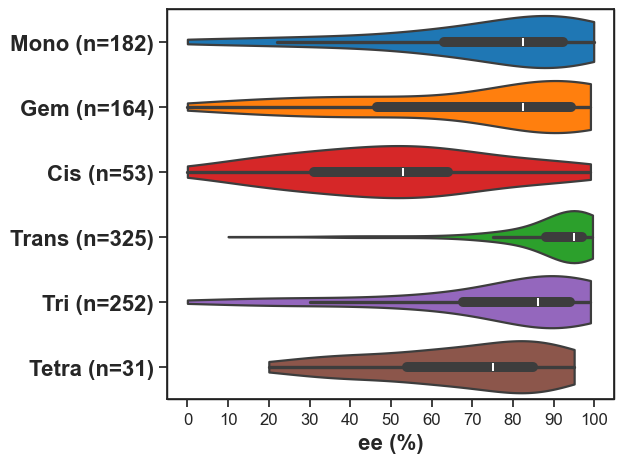

In [2]:
DB_df = pd.read_csv('SAD_Database.csv')

x = 'ee (%)'
# x = 'ddG er (kcal/mol)'

match x:
    case 'ee (%)':
        xticks = range(0,101,10)
        title = 'SAD Database ($%ee$})'
    case 'ddG er (kcal/mol)':
        xticks = [0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4]
        title = r"SAD Database ($\Delta\Delta$$G^\ddag$)"

g = sns.violinplot(data=DB_df,
    bw_method = 0.5,  
    x = x,
    # x = 'ddG er (kcal/mol)',
    y = 'Olefin Type',
    density_norm = 'width',
    hue='Olefin Type',
    order = alk_types.keys(),
    palette=alk_types,
    orient = 'h',
    inner='box',
    saturation = 1,
    cut=0,
    linewidth=1.6
)
g.patch.set_edgecolor('black')
g.patch.set_linewidth(1)

yticklabels = [f'{alk} (n={find_unique_alk(DB_df,alk)})' for alk in alk_types]

g.set(
    yticklabels = yticklabels,
    xticks=xticks
)

g.set_xticklabels(xticks, fontsize=12)
g.set_yticklabels(yticklabels,fontsize=16, weight='bold')

g.set_xlabel('ee (%)', fontsize=16, weight='bold')
g.set_ylabel('')

plt.tight_layout()
plt.show()